(Rbolo , Tbolo) = (0.0060, 0.16)
Psat = 1.00e-12
beta = n-1


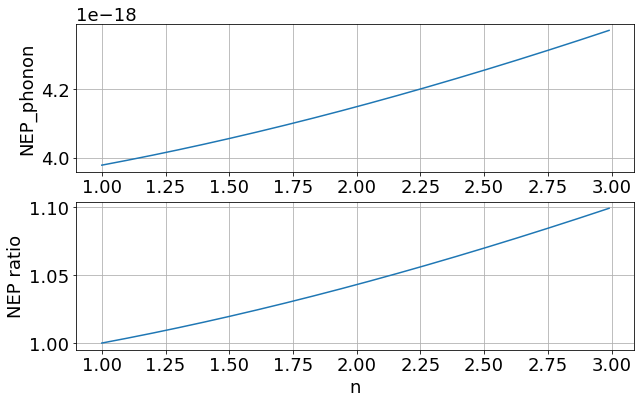

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# 
k = 1.38e-23
#


expt = 'CMBS4'
#expt = 'Bicep'

if (expt=='CMBS4'):
    R_b = 0.006    # Bolometer operating resistance, from J. Filippini
    T_bolo = 0.160   # Bolometer temperature
    T_bath = 0.100
    R_s = 0.0004    # Shunt resistance, from J. Filippini
    T_shunt = T_bath      # Temperature of shunt resistaor, which is on the cold plate.

if (expt == 'Bicep'):
    R_b = 0.050
    T_bolo = 0.5
    T_bath = 0.25
    R_s = 0.004
    T_shunt = T_bath


n = np.arange(1.0,3.0,0.01)  #pW
beta = n-1
Tratio = T_bath/T_bolo
Flink = (beta+1)/(2*beta+3) * (1-Tratio**(2*beta+3))/(1-Tratio**(beta+1))

Psat = 1e-12
Gdyn = Psat*n*T_bolo**beta/(T_bolo**n-T_bath**n)


NEP_phonon = np.sqrt(4*k*Gdyn*Flink*T_bolo**2) 


print('(Rbolo , Tbolo) = ({0:2.4f}, {1:2.2f})'.format(R_b,T_bolo))
print('Psat = {0:2.2e}'.format(Psat))
print('beta = n-1')


%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [10, 6]

plt.subplot(2,1,1)
plt.plot(n,NEP_phonon)
plt.xlabel('n')
plt.ylabel('NEP_phonon')
plt.grid()
plt.subplot(2,1,2)
plt.plot(n,NEP_phonon/NEP_phonon[0])
plt.xlabel('n')
plt.ylabel('NEP ratio')
plt.grid()